In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
dataset = pd.read_csv('Trade_Details_Fake.csv')
dataset.head()

,Unnamed: 0,No.,DL_CD,TXN_DT,DL_TM,DT_CNFRM,TRDNG_MD_CD,TRDNG_MTHD_CD,TRDNG_MD,PRDCT_CD,...,FLEG_FWD_PNT,SWAP_PNT,FR_LEG_TXN_ALL_PRC,INTR_FLEG_BASE_CCY_DIR,FLEG_CONTRA_AMNT,FLEG_DLT_AMNT,FR_LEG_BASE_AMNT,FR_LEG_TERM_AMNT,FR_LEG_RSK_AMNT,SYS_NO
0,0,0,FFC9-01ED-0000-7A,2019/12/17,17-12月-19 08.04.18.000000 下午,2019/12/17,QDM,RFQ,1,FXSWP,...,2.00,2.00,6.000300,B,6000300.0,1000000.0,1000000.0,6000300.0,439048.48,NaN
1,1,1,FFC9-01ED-0000-6D,2019/12/17,17-12月-19 07.34.48.000000 下午,2019/12/17,QDM,RFQ,1,FXSWP,...,2.22,2.22,0.063003,B,15872204.0,1000000.0,15872204.0,1000000.0,73171.09,NaN
2,2,2,FFC9-01ED-0000-69,2019/12/17,17-12月-19 07.28.49.000000 下午,2019/12/17,QDM,RFQ,1,FXSWP,...,2.33,2.33,6.200243,S,6200243.0,1000000.0,1000000.0,6200243.0,73171.09,NaN
3,3,3,FFC9-01ED-0000-6E,2019/12/17,17-12月-19 07.39.35.000000 下午,2019/12/17,QDM,RFQ,1,FXSWP,...,7.23,7.23,0.067808,B,14747472.0,1000000.0,14747472.0,1000000.0,73171.09,NaN
4,4,4,FFC9-01ED-0000-6C,2019/12/17,17-12月-19 07.33.31.000000 下午,2019/12/17,QDM,RFQ,1,FXSWP,...,2.33,2.33,0.067803,B,14748538.0,1000000.0,14748538.0,1000000.0,73171.09,NaN


In [7]:
usddata = dataset.loc[dataset['CCY_PAIR_CD'] =='USD/CNY']
usddata = usddata.loc[usddata['PRDCT_CD']=='FXSWP']
usddata['TXN_DT'] = pd.to_datetime(usddata['TXN_DT'])
usddata.head()

,Unnamed: 0,No.,DL_CD,TXN_DT,DL_TM,DT_CNFRM,TRDNG_MD_CD,TRDNG_MTHD_CD,TRDNG_MD,PRDCT_CD,...,FLEG_FWD_PNT,SWAP_PNT,FR_LEG_TXN_ALL_PRC,INTR_FLEG_BASE_CCY_DIR,FLEG_CONTRA_AMNT,FLEG_DLT_AMNT,FR_LEG_BASE_AMNT,FR_LEG_TERM_AMNT,FR_LEG_RSK_AMNT,SYS_NO
8,8,8,FFC9-01ED-0000-51,2019-12-17,17-12月-19 10.01.14.000000 上午,2019/12/17,QDM,RFQ,1,FXSWP,...,22.0,22.0,6.99970,S,6999700.0,1000000.0,1000000.0,6999700.0,1000000.0,NaN
16,16,16,FFC9-01E9-0000-6A,2019-12-16,16-12月-19 09.09.48.000000 上午,2019/12/16,QDM,RFQ,1,FXSWP,...,17.5,17.5,7.01775,S,7017750.0,1000000.0,1000000.0,7017750.0,1000000.0,NaN
19,19,19,FFC9-01ED-0000-41,2019-12-16,16-12月-19 04.59.39.000000 下午,2019/12/16,QDM,RFQ,1,FXSWP,...,17.0,17.0,7.01770,S,7017700.0,1000000.0,1000000.0,7017700.0,1000000.0,NaN
20,20,20,FFC9-01ED-0000-06,2019-12-16,16-12月-19 11.40.00.000000 上午,2019/12/16,QDM,RFQ,1,FXSWP,...,5.0,1.0,6.66820,S,6668200.0,1000000.0,1000000.0,6668200.0,1000000.0,NaN
22,22,22,FFC9-01ED-0000-22,2019-12-16,16-12月-19 02.23.37.000000 下午,2019/12/16,QDM,RFQ,1,FXSWP,...,5.0,1.0,6.66820,S,6668200.0,1000000.0,1000000.0,6668200.0,1000000.0,NaN


In [8]:
# 以30分钟为间隔采样 9:30 - 23:30
num_of_periods = 28

# 为每一条记录添加 period 字段，判定其属于当天的第几个时段

from datetime import datetime as dt
start = dt.strptime('09:30:00',"%H:%M:%S")
end = dt.strptime('23:30:00',"%H:%M:%S")
interval = (end-start)/num_of_periods
# n+1 breakpoints
period_breaks = [(start+i*interval).strftime('%H:%M:%S') for i in range(num_of_periods)]+[end.strftime('%H:%M:%S')]

# DL_TM 格式：'2017-11-21T20:46:03.000+08:00'
def period_mark(DL_TM:str):
    for i in range(1,num_of_periods+1):
        if DL_TM[11:19]<=period_breaks[i]:
            return i
    return "Unknown"

period_breaks

['09:30:00',
 '10:00:00',
 '10:30:00',
 '11:00:00',
 '11:30:00',
 '12:00:00',
 '12:30:00',
 '13:00:00',
 '13:30:00',
 '14:00:00',
 '14:30:00',
 '15:00:00',
 '15:30:00',
 '16:00:00',
 '16:30:00',
 '17:00:00',
 '17:30:00',
 '18:00:00',
 '18:30:00',
 '19:00:00',
 '19:30:00',
 '20:00:00',
 '20:30:00',
 '21:00:00',
 '21:30:00',
 '22:00:00',
 '22:30:00',
 '23:00:00',
 '23:30:00']

In [10]:
basic_data = usddata[['TXN_DT','DL_TM','NLEG_SPOT_EXCHNG_RATE','NR_LEG_RSK_AMNT','TKR_DIR']]
basic_data['period']=basic_data['DL_TM'].apply(period_mark)
basic_data['timestamp']=basic_data['DL_TM'].apply(lambda x: x[11:-6])
basic_data.set_index(['TXN_DT','period'],inplace=True)
basic_data.tail()

DL_TM  NLEG_SPOT_EXCHNG_RATE  \
TXN_DT     period                                                         
2019-10-22 Unknown  22-10月-19 09.49.32.000000 上午                    6.8   
           Unknown  22-10月-19 09.49.32.000000 上午                    6.8   
           Unknown  22-10月-19 09.49.32.000000 上午                    6.8   
           Unknown  22-10月-19 09.49.32.000000 上午                    6.8   
           Unknown  22-10月-19 09.49.32.000000 上午                    6.8   

                    NR_LEG_RSK_AMNT TKR_DIR    timestamp  
TXN_DT     period                                         
2019-10-22 Unknown        2000000.0       B  9.49.32.000  
           Unknown        2000000.0       B  9.49.32.000  
           Unknown        2000000.0       B  9.49.32.000  
           Unknown        2000000.0       B  9.49.32.000  
           Unknown        2000000.0       B  9.49.32.000

In [11]:
df_sum_value = basic_data.groupby(['TXN_DT','period'])[['NR_LEG_RSK_AMNT']].sum() / basic_data.groupby(['TXN_DT'])[['NR_LEG_RSK_AMNT']].sum()
df_sum_value.columns = ['Percentage_Value']
df_sum_value.tail(10)

Percentage_Value
TXN_DT     period                   
2019-12-11 Unknown          0.003755
2019-12-12 1                0.999964
           Unknown          0.000036
2019-12-13 1                0.161296
           21               0.275480
           Unknown          0.563224
2019-12-16 1                0.519998
           21               0.360003
           Unknown          0.119999
2019-12-17 1                1.000000

In [12]:
temp = pd.DataFrame(index = df_sum_value.index.get_level_values(0).unique(),columns=range(1,29)) #创建空的DataFrame
temp.iloc[:,:] = 1
temp = temp.stack()
temp[:]=np.nan
temp.index.names=['TXN_DT','period']
temp = temp.to_frame('temp')
temp['Percentage_Value']=df_sum_value
temp = temp.fillna(0)
df_sum_value = temp[['Percentage_Value']]
del temp
df_sum_value.tail(10)

Percentage_Value
TXN_DT     period                  
2019-12-17 19                   0.0
           20                   0.0
           21                   0.0
           22                   0.0
           23                   0.0
           24                   0.0
           25                   0.0
           26                   0.0
           27                   0.0
           28                   0.0

In [13]:
# 向前追溯30天，构建每个period的Volume Profile
rolling_Percentage_Value = df_sum_value.groupby(level=1).rolling(30).mean().droplevel(0).sort_index()
rolling_Percentage_Value.tail(10)

Percentage_Value
TXN_DT     period                  
2019-12-17 19              0.000000
           20              0.000000
           21              0.223065
           22              0.000000
           23              0.000000
           24              0.000000
           25              0.000000
           26              0.000000
           27              0.000000
           28              0.000000

### VWAP

In [14]:
df_sumproduct = basic_data.groupby(['TXN_DT','period'])[['NR_LEG_RSK_AMNT']].sum()
df_sumproduct.columns = ['TotalValue']
VWAP = ((basic_data['NLEG_SPOT_EXCHNG_RATE']*basic_data['NR_LEG_RSK_AMNT'])
        .groupby(['TXN_DT','period'])
        .sum()/df_sumproduct['TotalValue']).to_frame('VWAP')

VWAP.tail()

VWAP
TXN_DT     period           
2019-12-13 Unknown  6.243762
2019-12-16 1        6.677162
           21       7.859214
           Unknown  7.015933
2019-12-17 1        6.997500

In [15]:
rolling_Percentage_Value['VWAP'] = VWAP['VWAP']
rolling_Percentage_Value.fillna(method = 'ffill',inplace = True) #解决无交易时段，VWAP值不存在的情况
rolling_Percentage_Value.tail(10)

Percentage_Value    VWAP
TXN_DT     period                          
2019-12-17 19              0.000000  6.9975
           20              0.000000  6.9975
           21              0.223065  6.9975
           22              0.000000  6.9975
           23              0.000000  6.9975
           24              0.000000  6.9975
           25              0.000000  6.9975
           26              0.000000  6.9975
           27              0.000000  6.9975
           28              0.000000  6.9975

In [17]:
# 基本场景1： 2019-12-17 早上9:30 VWAP-1 day 求解预期平均成交价格
rolling_Percentage_Value['Multiplier'] = (rolling_Percentage_Value['Percentage_Value']*rolling_Percentage_Value['VWAP'])
rolling_Percentage_Value.groupby('TXN_DT')['Multiplier'].sum().loc['2019-12-17']

4.234496181242196

In [18]:
# 基本场景2： 2019-12-17 早上9:30 VWAP-0.5 day 求解预期平均成交价格
today = rolling_Percentage_Value.loc['2019-12-17'].iloc[0:14].drop('Multiplier',axis = 1)
adj_factor = 1/rolling_Percentage_Value.loc['2019-12-17'].iloc[0:14]['Percentage_Value'].sum()
today['Adjusted_Percentage_0.5_day'] = today['Percentage_Value'] * adj_factor
today['Multiplier'] = (today['Adjusted_Percentage_0.5_day']*today['VWAP'])
today.groupby('TXN_DT')['Multiplier'].sum().loc['2019-12-17']

6.997499999999999

In [19]:
def VWAP_Price(date, dur, start=0):
    today = rolling_Percentage_Value.loc[date].iloc[int(28*start):int(28*(start+dur))].drop('Multiplier',axis = 1)
    adj_factor = 1/rolling_Percentage_Value.loc[date].iloc[int(28*start):int(28*(start+dur))]['Percentage_Value'].sum()
    today['Adjusted_Percentage'] = today['Percentage_Value'] * adj_factor
    today['Multiplier'] = (today['Adjusted_Percentage']*today['VWAP'])
    price = today.groupby('TXN_DT')['Multiplier'].sum().loc[date]
    return price

In [20]:
VWAP_Price('2019-12-17',1),VWAP_Price('2019-12-17',0.75),VWAP_Price('2019-12-17',0.5)

(6.9975, 6.9975, 6.997499999999999)

In [21]:
VWAP_Price('2019-12-17',0.5)

6.997499999999999

### POV

In [22]:
df_sum = basic_data.groupby(['TXN_DT','period'])[['NR_LEG_RSK_AMNT']].sum()
df_sum.columns = ['Total_Amount']
temp = pd.DataFrame(index = df_sum.index.get_level_values(0).unique(),columns=range(1,29)) #创建空的DataFrame
temp.iloc[:,:] = 1
temp = temp.stack()
temp[:]=np.nan
temp.index.names=['TXN_DT','period']
temp = temp.to_frame('temp')
temp['Total_Amount']=df_sum
temp = temp.fillna(0)
df_sum = temp[['Total_Amount']]
del temp
df_sum.tail(10)

Total_Amount
TXN_DT     period              
2019-12-17 19               0.0
           20               0.0
           21               0.0
           22               0.0
           23               0.0
           24               0.0
           25               0.0
           26               0.0
           27               0.0
           28               0.0

In [23]:
#每一区间的30天历史平均成交量
rolling_amount = df_sum.groupby(level=1).rolling(30).mean().droplevel(0).sort_index()
rolling_amount.tail(10)

Total_Amount
TXN_DT     period              
2019-12-17 19      0.000000e+00
           20      0.000000e+00
           21      5.805455e+09
           22      0.000000e+00
           23      0.000000e+00
           24      0.000000e+00
           25      0.000000e+00
           26      0.000000e+00
           27      0.000000e+00
           28      0.000000e+00

In [24]:
# 基本场景1： 2019-12-17 早上9:30 POV-1% 头寸 100,000,000(1亿）求解预期平均成交价格

Total_Position = 100000000
POV = 0.01

rolling_amount['VWAP'] = rolling_Percentage_Value['VWAP']
rolling_amount_today = rolling_amount.xs(['2019-12-17'])
rolling_amount_today['POV%'] = rolling_amount_today['Total_Amount'] * POV
rolling_amount_today['cumsum'] = rolling_amount_today['POV%'].cumsum()
rolling_amount_today

,Total_Amount,VWAP,POV%,cumsum
period,,,,
1,6.509723e+09,6.9975,6.509723e+07,6.509723e+07
2,0.000000e+00,6.9975,0.000000e+00,6.509723e+07
3,0.000000e+00,6.9975,0.000000e+00,6.509723e+07
4,0.000000e+00,6.9975,0.000000e+00,6.509723e+07
5,0.000000e+00,6.9975,0.000000e+00,6.509723e+07
6,0.000000e+00,6.9975,0.000000e+00,6.509723e+07
7,0.000000e+00,6.9975,0.000000e+00,6.509723e+07
8,0.000000e+00,6.9975,0.000000e+00,6.509723e+07
9,0.000000e+00,6.9975,0.000000e+00,6.509723e+07


In [25]:
rolling_amount_today['position_left'] = Total_Position - rolling_amount_today['cumsum']
rolling_amount_today['percentage'] = rolling_amount_today['POV%']/Total_Position

#定义计数器：该策略总计需要在count个period实施挂单交易
count = rolling_amount_today[rolling_amount_today['position_left']>0].count()[0] + 1

#只保留有交易的period
rolling_amount_today = rolling_amount_today.iloc[0:count,:]

#最后一个period的交易量等于期初总头寸 减去 已执行交易量
#最后一个period的percentage占比等于 1 减去 已交易进度百分比
rolling_amount_today.iloc[-1,2] = Total_Position - rolling_amount_today['POV%'][:-1].sum()
rolling_amount_today.iloc[-1,5] = 1 - rolling_amount_today['percentage'][:-1].sum()

#假设在每个period内仍以VWAP价格成交
rolling_amount_today['Multiplier'] = (rolling_amount_today['percentage']*rolling_amount_today['VWAP'])
POV_average_price = rolling_amount_today['Multiplier'].sum()
POV_average_price

6.9975

In [26]:
def POV_Price( date, pov_param, size):
    Total_Position = size
    POV = pov_param
    
    rolling_amount['VWAP'] = rolling_Percentage_Value['VWAP']
    rolling_amount_today = rolling_amount.xs(date)
    rolling_amount_today['POV%'] = rolling_amount_today['Total_Amount'] * POV
    rolling_amount_today['cumsum'] = rolling_amount_today['POV%'].cumsum()
        
    rolling_amount_today['position_left'] = Total_Position - rolling_amount_today['cumsum']
    rolling_amount_today['percentage'] = rolling_amount_today['POV%']/Total_Position

    #定义计数器：该策略总计需要在count个period实施挂单交易
    count = rolling_amount_today[rolling_amount_today['position_left']>0].count()[0] + 1

    #只保留有交易的period
    rolling_amount_today = rolling_amount_today.iloc[0:count,:]

    #最后一个period的交易量等于期初总头寸 减去 已执行交易量
    #最后一个period的percentage占比等于 1 减去 已交易进度百分比
    rolling_amount_today.iloc[-1,2] = Total_Position - rolling_amount_today['POV%'][:-1].sum()
    rolling_amount_today.iloc[-1,5] = 1 - rolling_amount_today['percentage'][:-1].sum()

    #假设在每个period内仍以VWAP价格成交
    rolling_amount_today['Multiplier'] = (rolling_amount_today['percentage']*rolling_amount_today['VWAP'])
    POV_average_price = rolling_amount_today['Multiplier'].sum()
    return(POV_average_price)

In [28]:
POV_Price('2019-12-17',0.01,100000000)

6.9975

### 比较交易员实际平均成交价格与潜在最低策略成交价格

In [29]:
basic_data = pd.read_csv('basic_data.csv')
basic_data = basic_data.set_index(['TXN_DT','CCY_PAIR_CD','period','_id'])
basic_data.head()

DL_TM  \
TXN_DT     CCY_PAIR_CD period _id                                   
2007-04-09 USD/CNY     1      3708  2007-04-09T09:30:17.000+08:00   
                              3709  2007-04-09T09:30:23.000+08:00   
                              3710  2007-04-09T09:30:46.000+08:00   
                              3711  2007-04-09T09:30:53.000+08:00   
                              3712  2007-04-09T09:32:54.000+08:00   

                                    NLEG_SPOT_EXCHNG_RATE  NR_LEG_RSK_AMNT  \
TXN_DT     CCY_PAIR_CD period _id                                            
2007-04-09 USD/CNY     1      3708                 7.7280        1000000.0   
                              3709                 7.7260        1880000.0   
                              3710                 7.7275       10000000.0   
                              3711                 7.7293          16888.0   
                              3712                 7.7276       10000000.0   

                                   TKR_DIR INTR_INSTN_CD     TKR_TRDR_CD  \
TXN_DT     CCY_PAIR_CD period _id                                          
2007-04-09 USD/CNY     1      3708       S          IIBR     bash.dealer   
                              3709       S          JUBL     lele.dealer   
                              3710       S          IULX    gavin.dealer   
                              3711       B          JUBL   yushui.dealer   
                              3712       S          JKKR  zhangle.dealer   

                                        time  record_count  
TXN_DT     CCY_PAIR_CD period _id                           
2007-04-09 USD/CNY     1      3708  09:30:17           320  
                              3709  09:30:23           320  
                              3710  09:30:46           320  
                              3711  09:30:53           320  
                              3712  09:32:54           320

In [30]:
basic_data = basic_data['2018-01-01':]
basic_data = basic_data.loc[(slice(None),'USD/CNY',slice(None)),:]

In [31]:
df_sum_value = basic_data.groupby(['TXN_DT','TKR_TRDR_CD','TKR_DIR'])[['NR_LEG_RSK_AMNT']].sum()
df_sum_value.columns = ['TotalValue']
basic_data['sum_product'] = basic_data['NLEG_SPOT_EXCHNG_RATE']*basic_data['NR_LEG_RSK_AMNT']
sumproduct = basic_data.groupby(['TXN_DT','TKR_TRDR_CD','TKR_DIR'])[['sum_product']].sum()
df_sum_value = pd.merge(df_sum_value,sumproduct,left_index=True,right_index=True)
df_sum_value['Average_Execution_Price'] = df_sum_value['sum_product']/df_sum_value['TotalValue']
df_sum_value.head()

TotalValue   sum_product  \
TXN_DT     TKR_TRDR_CD    TKR_DIR                             
2018-01-02 00120787       B         8000000.0  5.203200e+07   
           006.dealer     S         3000000.0  1.949640e+07   
           8772500.dealer S         1460000.0  9.486788e+06   
           882703.dealer  S           15294.7  9.936355e+04   
           A0248.dealer   B         2490000.0  1.618176e+07   

                                   Average_Execution_Price  
TXN_DT     TKR_TRDR_CD    TKR_DIR                           
2018-01-02 00120787       B                         6.5040  
           006.dealer     S                         6.4988  
           8772500.dealer S                         6.4978  
           882703.dealer  S                         6.4966  
           A0248.dealer   B                         6.4987

In [39]:
Buys = df_sum_value.loc[(slice(None),slice(None),'B'),:].drop(['sum_product'],axis = 1)
Buys.head()

TotalValue  Average_Execution_Price
TXN_DT     TKR_TRDR_CD     TKR_DIR                                     
2018-01-02 00120787        B         8000000.0                 6.504000
           A0248.dealer    B         2490000.0                 6.498700
           Baoxiang.dealer B        25000000.0                 6.496600
           HYCA            B        70000000.0                 6.500086
           Lily.dealer     B        10000000.0                 6.498800

In [33]:
# VWAP Strategy execution price estimation
datelist = Buys.index.get_level_values(0).unique()
df_VWAP = pd.DataFrame(index = datelist)
VWAP_Execution_Price = []
params = [0.25,0.5,0.75,1]

for param in params:
    for i in range (0,len(datelist)):
        Average_Price = VWAP_Price(datelist[i],param)
        VWAP_Execution_Price.append(Average_Price)
    df_VWAP['VWAP-{}'.format(param)] = VWAP_Execution_Price
    VWAP_Execution_Price = []

df_VWAP.tail()

,VWAP-0.25,VWAP-0.5,VWAP-0.75,VWAP-1
TXN_DT,,,,
2019-05-28,6.904726,6.906284,6.906580,6.906614
2019-05-29,6.915150,6.914400,6.914198,6.914180
2019-05-30,6.913454,6.909927,6.909751,6.909728
2019-05-31,6.910703,6.907822,6.907616,6.907617
2019-06-03,6.900138,6.902980,6.903206,6.903218


In [67]:
MERGE = pd.merge(Buys,df_VWAP,left_index = True, right_index = True)
MERGE['Min_Price'] = MERGE[['VWAP-0.25','VWAP-0.5','VWAP-0.75','VWAP-1']].min(axis=1)
MERGE = MERGE.loc[MERGE['Min_Price']>0]
MERGE['Average_Execution_Price'].mean(), MERGE['Average_Execution_Price'].std(),MERGE['Min_Price'].mean(),MERGE['Min_Price'].std()

(6.6746411007301685,
 0.22608321497456793,
 6.672829595236281,
 0.22623102337978693)

In [41]:
from scipy import stats
t,p_twoTail = stats.ttest_rel(MERGE['Average_Execution_Price'],MERGE['Min_Price'])
p_oneTail = p_twoTail/2
critical = stats.t.ppf(0.975,121788)
critical2 = stats.t.ppf(0.95,121788)
print('t值：',t,'双尾检验p值：',p_twoTail,'单尾检验p值：',p_oneTail,'双尾临界值：',critical,'单尾临界值：',critical2)

# Min_price显著小于Average_Execution_Price

t值： 81.86691677523532 双尾检验p值： 0.0 单尾检验p值： 0.0 双尾临界值： 1.959983463424722 单尾临界值： 1.6448661386998291


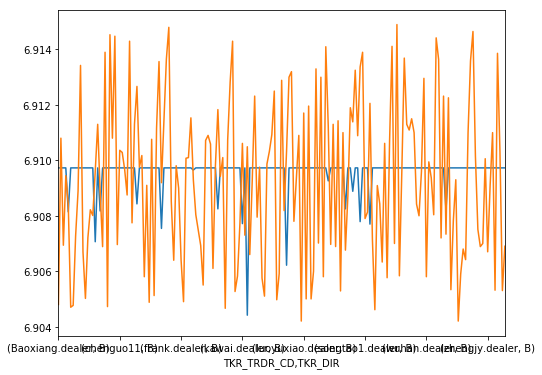

In [71]:
MERGE.loc['2019-05-30']['Min_Price'].plot(figsize = (8,6))
MERGE.loc['2019-05-30']['Average_Execution_Price'].plot(figsize = (8,6))

In [56]:
POV_1=[]
for i in range (0,len(MERGE['TotalValue'])):
    df_POV_1 = POV_Price(MERGE.index.get_level_values(0)[i],0.01,MERGE['TotalValue'][i])
    POV_1.append(df_POV_1)
POV_1[0]

6.482255798090041

In [60]:
df_POV_1= pd.DataFrame(POV_1,index = MERGE.index)
df_POV_1.columns = ['POV-1%']
df_POV_1.head()

POV-1%
TXN_DT     TKR_TRDR_CD  TKR_DIR          
2018-01-08 00120787     B        6.482256
           A0248.dealer B        6.482256
           HYCA         B        6.497691
           HuangKeJie   B        6.484630
           JoeyGao      B        6.482256

In [68]:
MERGE = pd.merge(MERGE,df_POV_1,left_index = True, right_index = True)
MERGE['Min_Price'] = MERGE[['VWAP-0.25','VWAP-0.5','VWAP-0.75','VWAP-1','POV-1%']].min(axis=1)
MERGE.head()

TotalValue  Average_Execution_Price  \
TXN_DT     TKR_TRDR_CD  TKR_DIR                                         
2018-01-08 00120787     B          6000000.0                 6.485417   
           A0248.dealer B           322000.0                 6.491081   
           HYCA         B        221000000.0                 6.486736   
           HuangKeJie   B         15000000.0                 6.486433   
           JoeyGao      B          5000000.0                 6.489180   

                                 VWAP-0.25  VWAP-0.5  VWAP-0.75    VWAP-1  \
TXN_DT     TKR_TRDR_CD  TKR_DIR                                             
2018-01-08 00120787     B          6.48632   6.48815   6.489256  6.490227   
           A0248.dealer B          6.48632   6.48815   6.489256  6.490227   
           HYCA         B          6.48632   6.48815   6.489256  6.490227   
           HuangKeJie   B          6.48632   6.48815   6.489256  6.490227   
           JoeyGao      B          6.48632   6.48815   6.489256  6.490227   

                                 Min_Price    POV-1%  
TXN_DT     TKR_TRDR_CD  TKR_DIR                       
2018-01-08 00120787     B         6.482256  6.482256  
           A0248.dealer B         6.482256  6.482256  
           HYCA         B         6.486320  6.497691  
           HuangKeJie   B         6.484630  6.484630  
           JoeyGao      B         6.482256  6.482256